<h2>Boosting for Least Square</h2>
<p>Code for implementing Boosting with a dataset which describe room occupancy from Temperature,Humidity,Light and CO2.</p>
<p>Iterate 1500 times for a simple classifier(least square).</p>

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
PATH = 
X_TRAIN = pd.read_csv(PATH+"/X_train.csv",header = None)
X_TEST = pd.read_csv(PATH+"/X_test.csv",header = None)
Y_TRAIN = pd.read_csv(PATH+"/y_train.csv",header = None)
Y_TEST = pd.read_csv(PATH+"/y_test.csv",header = None)
X_TRAIN['5']=1
X_TEST['5']=1
x_train = np.matrix(X_TRAIN)
x_test = np.matrix(X_TEST)
y_train = np.matrix(Y_TRAIN)
y_test = np.matrix(Y_TEST)

#initial
wt = np.matrix([1/len(X_TRAIN)]*len(X_TRAIN)).T


In [3]:
def pred(x,w_ls):
    y_p = np.ones(shape=(len(x),1))
    y_index = np.where(x*w_ls<0)
    y_p[y_index] = -1
    return y_p

def boost_pred(x,at_all,w_ls_all,pred=pred):
    f_boost = np.zeros(shape=(len(x),1))
    for i in range(0,len(at_all)):
        each_y = pred(x,w_ls_all[i])
        f_boost+= each_y*at_all[i]
    
    pred = np.ones(shape=(len(x),1))
    pred[np.where(f_boost < 0)] = -1
    return pred

def check_err(y,y_pred):
    return int(sum((y != y_pred)))/len(y)

In [4]:
at_all = []
w_ls_all = []
et_all = []
train_error = []
test_error = []
train_data = []

for t in range(0,1500):
    #sampling
    index = np.random.choice(list(range(0,len(x_train))),size=len(x_train),p= wt.T.tolist()[0])
    bt = x_train[index]
    yt = y_train[index]
    train_data += index.tolist()
    
    #model
    w_ls = (bt.T*bt).I*bt.T*yt
    #y_pred 
    y_pred = pred(x_train,w_ls)
    
    #error
    error = float(sum((y_train != y_pred).T*wt))
           
    if error > 0.5:
        w_ls = -w_ls
        y_pred = pred(x_train,w_ls)
        error = float(sum((y_train != y_pred).T*wt))
        
    at = np.log((1-error)/error)/2
        
    w_ls_all.append(w_ls)
    at_all.append(at)
    et_all.append(error)
    
    train_pred = boost_pred(x_train,at_all,w_ls_all)
    train_error.append(check_err(y_train,train_pred))  
    
    test_pred = boost_pred(x_test,at_all,w_ls_all)
    test_error.append(check_err(y_test,test_pred))
                       
    #next step preperation for sampling
    y_f = np.ones(shape=(len(y_train),1))
    y_f[np.where(y_pred!=y_train)] = -1
    wt = np.multiply(np.exp(-at*y_f),wt)
    wt = wt/sum(wt)

                    
 

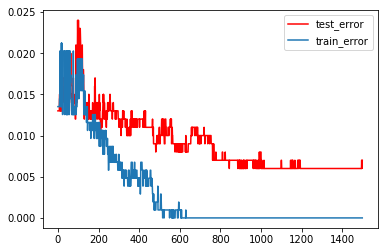

In [9]:
plt.plot(test_error,'r',label = 'test_error')
plt.plot(train_error,label = 'train_error')
plt.legend()
plt.show()

In [10]:
#upper_bound
upper_bounds = list()
for t in range(0,1500):
    upper_bound = 0
    for i in range(0,t+1):
        upper_bound += pow(1/2- et_all[i],2)
    upper_bounds.append(np.exp(-2*upper_bound))

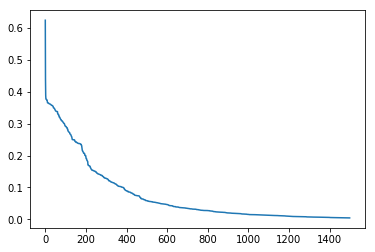

In [11]:
plt.plot(upper_bounds)

In [5]:
#pd.DataFrame(train_data).groupby(0).count()
l=[]
mylist = train_data
myset = set(mylist) 
for item in myset: 
     l.append((item,mylist.count(item)))

In [ ]:
#counter = pd.DataFrame(l,columns=['train_no','frequency'])
#counter = counter.set_index('train_no')
plt.hist(sorted(train_data),bins=len(train_data))
#pd.DataFrame(train_data).plot()

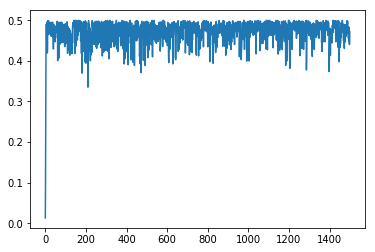

In [12]:
plt.plot(et_all)

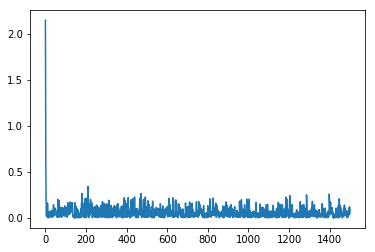

In [13]:
plt.plot(at_all)

(array([ 5533.,  5981.,  9604., ...,  6152.,  4306.,  6964.]),
 array([   0,    1,    2, ..., 1033, 1034, 1035]),
 <a list of 1035 Patch objects>)

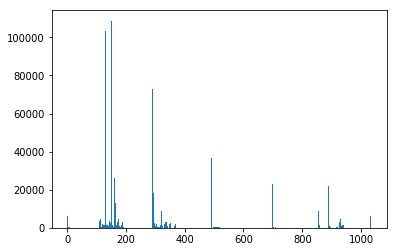

In [8]:
plt.hist(sorted(train_data),bins=list(range(0,1036)))